# **The sparks Foundaion internship on Data Science & Business Analytics**
>by **Adrija Sarkar**

our task01 in this internship is to observe how can we make a linear regression model such that it can find out solution to a simple problem --

**What is the relation between the scores that a student gets and how many hours does that student studies?**

**What will be the student's score in percentage if he/she studied 9.25 hr a day?**

**We will first import all libraries required for this task.**

In [37]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  

**Now we will download the required data from the given url:**


In [38]:
data = pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Now lets see by plotting the data using plt module of the matplotlib library that if there is any relation at all between the student's scores and the time he/she studies . And whether or not we can even use any linear regression model to predict his/her scores.

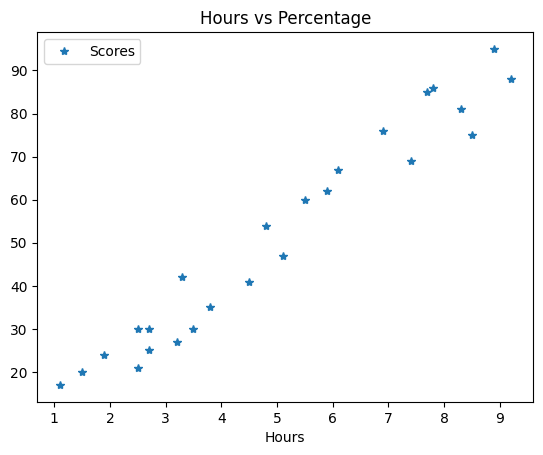

In [39]:
data.plot(x='Hours', y='Scores',style="*")  
plt.title('Hours vs Percentage')   
plt.show()

**So the graph reconfirms the fact that there is infact a sort of linear relation between the scores and the hours studied**

Now comes the important step where we have to divide the data into inputs and outputs

In [27]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Now** that we have our inputs and ouputs we have to further split the data into training and test sets.This can be done using train_test_split() method  of Scikit-Learn library.

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=0) 

**Now we will finally get to the actual part where we have to use the acquired data in the LinearRegression classes fit method to train the algorithm**

In [41]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

We will plot the regression line 

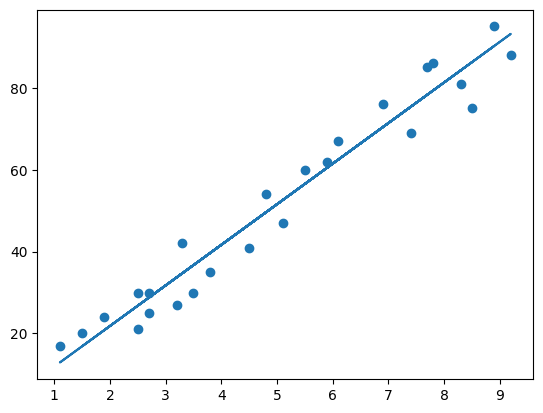

In [42]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

**We can also predict scores using the data acquired from input datas which was acquired previously**

In [43]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**So as we can see even though the predictions were pretty close to the actual scores given in the csv file there are still differences between these datas and original datas**

Now can we finally get to predict the student's score we can finally answer the question that was given to us in this task--

which is --
**what score would the student get if he/she studied for 9.25 hours a day?**

In [44]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### **Evaluating the model**

Since we have seen that the data which were predicted were still different than the actual scores we will just evaluate what is the mean absolute error

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
